# Notebook for assessment data

In [2]:
import torch 
import torchvision
from torchvision import io
import matplotlib.pyplot as plt 
import cv2
from skimage.metrics import structural_similarity
import numpy as np 
from PIL.Image import Image
from src.loss import Adv_loss,Enc_loss,Cnt_loss
import os
device = ("cuda" if torch.cuda.is_available() else "cpu")

/home/yuning/anaconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
g_e = torch.load("/home/yuning/DL/Monument/models/pt2_g_e_1200.pt");g_e.eval()
g_d = torch.load("/home/yuning/DL/Monument/models/pt2_g_d_1200.pt");g_d.eval()
dis = torch.load("/home/yuning/DL/Monument/models/pt2_dis_1200.pt");dis.eval()

dis(
  (dis_conv): Sequential(
    (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2))
    (BN1): BatchNorm2d([32], eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
    (Leaky1): LeakyReLU(negative_slope=0.01)
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (BN2): BatchNorm2d([64], eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
    (Leaky2): LeakyReLU(negative_slope=0.01)
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (conv4): Conv2d(128, 1, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
  )
  (dis_out): Sequential(
    (GlobAvgPool): AdaptiveAvgPool2d(output_size=1)
    (Sigmoid): Sigmoid()
  )
)

In [4]:
# abnormal_imag_path = "/home/yuning/DL/Monument/Test_IMG/Test_72/abnormal/"
normal_imag_path = "/home/yuning/DL/Monument/pt2_data/pt2_test_img/Test_72/normal/"
abnormal_imag_path = "/home/yuning/DL/Monument/pt2_data/pt2_test_img/Test_72/abnormal/"
abnormal_imag_path_list = [os.path.join(abnormal_imag_path,i) for i in os.listdir(abnormal_imag_path)]
normal_imag_path_list = [os.path.join(normal_imag_path,i) for i in os.listdir(normal_imag_path)]

In [5]:
# from src.utils import Encode_And_Mask
# save_dir = "/home/yuning/DL/Monument/pt2_data/pt2_n_out"


# Encode_And_Mask(normal_imag_path,save_dir,
#                 g_e,g_d,device)

image_id = 10
abnormal_image_name_list = os.listdir(abnormal_imag_path)

save_dir = "/home/yuning/DL/Monument/"
# save_dir = "/home/yuning/DL/Monument/abn_out_pt2"


abnormal_imag_snap = io.image.read_image(abnormal_imag_path_list[image_id])/255.0
abnormal_imag_snap_gpu= abnormal_imag_snap.unsqueeze(0).float().to(device)
with torch.no_grad():
    abnormal_imag_snap_encoded_gpu =g_d(g_e(abnormal_imag_snap_gpu))

abnormal_imag_snap_encoded_uint8 = torch.tensor(255.0*abnormal_imag_snap_gpu.clone().detach().cpu().squeeze(),dtype=torch.uint8)

abnormal_image_snap_mask = torch.abs(255.0*abnormal_imag_snap_encoded_gpu.clone().detach().cpu() - 255.0*abnormal_imag_snap_gpu.clone().detach().cpu())
abnormal_imag_snap_mask_uint8 = torch.tensor(abnormal_image_snap_mask.clone().detach().cpu().squeeze(),dtype=torch.uint8)


# io.write_jpeg(abnormal_imag_snap_mask_uint8,
#              os.path.join(save_dir,"mask_{}".format(abnormal_image_name_list[image_id])),
#                                                                                 quality=100)
# io.write_jpeg(abnormal_imag_snap_encoded_uint8,
#               os.path.join(save_dir,"encoded_{}".format(abnormal_image_name_list[image_id]))
#                                                                                 ,quality=100)


/tmp/ipykernel_3689/2190759169.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  abnormal_imag_snap_encoded_uint8 = torch.tensor(255.0*abnormal_imag_snap_gpu.clone().detach().cpu().squeeze(),dtype=torch.uint8)
/tmp/ipykernel_3689/2190759169.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  abnormal_imag_snap_mask_uint8 = torch.tensor(abnormal_image_snap_mask.clone().detach().cpu().squeeze(),dtype=torch.uint8)


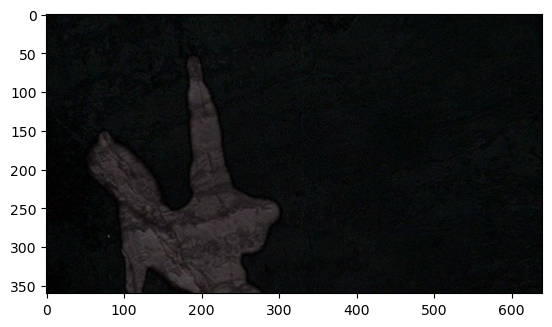

In [17]:
plt.imshow(abnormal_imag_snap_mask_uint8.permute(1,2,0),cmap="Blues")

## SSIM

/home/yuning/DL/Monument/pt2_data/pt2_test_img/Test_72/abnormal/Aug 301-crack.jpg
301-crack.jpg
/home/yuning/DL/Monument/pt2_data/pt2_abn_out_/encoded_Aug 301-crack.jpg
0.9852092272780205
229.0
/home/yuning/DL/Monument/pt2_data/pt2_test_img/Test_72/abnormal/Aug 173-salt.jpg
173-salt.jpg
/home/yuning/DL/Monument/pt2_data/pt2_abn_out_/encoded_Aug 173-salt.jpg
0.9812675299621156
199.0
/home/yuning/DL/Monument/pt2_data/pt2_test_img/Test_72/abnormal/Aug 173-ultra caving.jpg
173-ultra caving.jpg
/home/yuning/DL/Monument/pt2_data/pt2_abn_out_/mask_Aug 173-ultra caving.jpg
0.00445433805883784
12.0
/home/yuning/DL/Monument/pt2_data/pt2_test_img/Test_72/abnormal/Aug 301-shit.jpg
301-shit.jpg
/home/yuning/DL/Monument/pt2_data/pt2_abn_out_/mask_Aug 301-shit.jpg
0.015670248269385817
49.0
/home/yuning/DL/Monument/pt2_data/pt2_test_img/Test_72/abnormal/Aug 173-gross.jpg
173-gross.jpg
/home/yuning/DL/Monument/pt2_data/pt2_abn_out_/mask_Aug 173-gross.jpg
0.002312542462827611
94.0


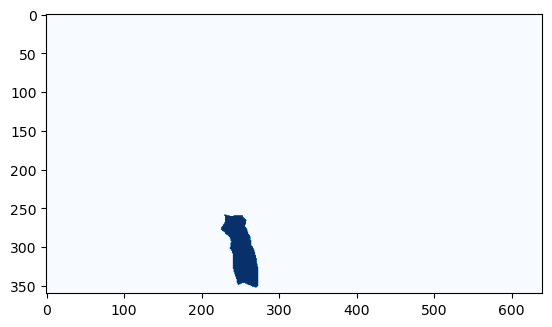

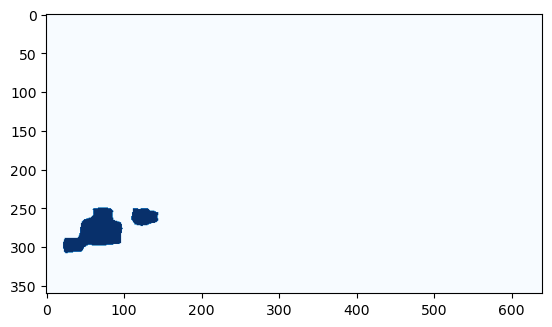

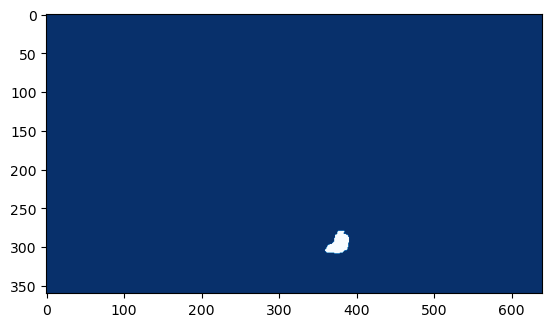

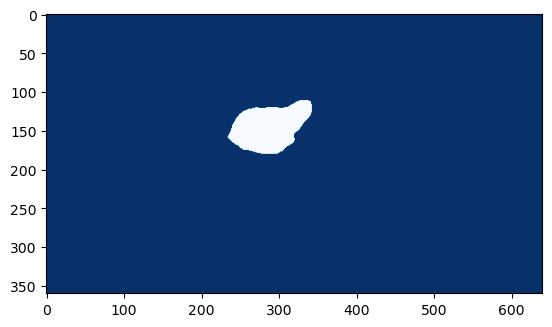

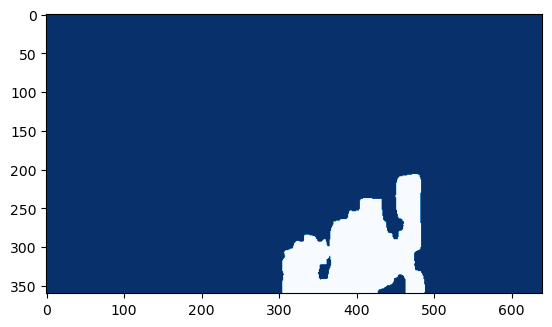

In [16]:
import cv2
SSMI_Score = {}
crt_score = {}
# for image_id in range(len(abnormal_imag_path_list)):
for image_id in range(5):
    print(abnormal_imag_path_list[image_id])
    image_No = abnormal_imag_path_list[image_id].find("Aug")

    abnormal_img_id = abnormal_imag_path_list[image_id][image_No+4:image_No+7]
    abnormal_img_file_name = abnormal_imag_path_list[image_id][image_No+4:]
    # print(normal_img_id)
    print(abnormal_img_file_name)

    encoded_abnormal_image_path = "/home/yuning/DL/Monument/pt2_data/pt2_abn_out_"
    encoded_abnormal_image_path_list = [ os.path.join(encoded_abnormal_image_path,i) for i in os.listdir(encoded_abnormal_image_path) ]

    for encoded_abn_image_dir in encoded_abnormal_image_path_list:
        if abnormal_img_file_name in encoded_abn_image_dir:
            encoded_abn_image_to_read = encoded_abn_image_dir

    print(encoded_abn_image_to_read)



    abnormal_image_snap_cv2 = cv2.imread(abnormal_imag_path_list[image_id])
    normal_image_snap_cv2 = cv2.imread(encoded_abn_image_to_read)

    abnormal_image_snap_grey =cv2.cvtColor(abnormal_image_snap_cv2,cv2.COLOR_BGR2GRAY)
    normal_image_snap_grey =cv2.cvtColor(normal_image_snap_cv2,cv2.COLOR_BGR2GRAY)

    (score,diff) = structural_similarity(abnormal_image_snap_grey,normal_image_snap_grey,win_size=29,full=True)
    SSMI_Score[abnormal_img_file_name] = score
    print(score)
    diff_to_show = (diff *255).astype("uint8")
    
    crt,thresh = cv2.threshold(diff_to_show,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
    plt.figure(image_id)
    print(crt)
    crt_score[abnormal_img_file_name] = crt
    plt.imshow(thresh,cmap="Blues")


In [8]:
type(diff),diff.dtype

(numpy.ndarray, dtype('float64'))

In [9]:
crt_score, SSMI_Score

({'301-crack.jpg': 229.0,
  '173-salt.jpg': 199.0,
  '173-ultra caving.jpg': 12.0,
  '301-shit.jpg': 49.0,
  '173-gross.jpg': 94.0,
  '145-seepage.jpg': 199.0,
  '145-gross.jpg': 88.0,
  '001-caving.jpg': 187.0,
  '301-ultra caving.jpg': 5.0,
  '047-gross.jpg': 111.0},
 {'301-crack.jpg': 0.9852092272780205,
  '173-salt.jpg': 0.9812675299621156,
  '173-ultra caving.jpg': 0.00445433805883784,
  '301-shit.jpg': 0.015670248269385817,
  '173-gross.jpg': 0.002312542462827611,
  '145-seepage.jpg': 0.9194920837603663,
  '145-gross.jpg': 0.003882109548893863,
  '001-caving.jpg': 0.9462877780597253,
  '301-ultra caving.jpg': 0.004418235776120861,
  '047-gross.jpg': 0.0033005836591808533})

## Discrimator

In [14]:
image_id = 6
abnormal_imag_snap = io.image.read_image(abnormal_imag_path_list[image_id])/255.0
normal_imag_snap = io.image.read_image(normal_imag_path_list[image_id])/255.0

abnormal_imag_snap_gpu= abnormal_imag_snap.unsqueeze(0).float().to(device)
normal_imag_snap_gpu= normal_imag_snap.unsqueeze(0).float().to(device)

with torch.no_grad():    
    abnormal_imag_score=Adv_loss(g_feature= g_e(abnormal_imag_snap_gpu),d_feature= dis(abnormal_imag_snap_gpu))
    normal_imag_score=Adv_loss(g_feature= g_e(normal_imag_snap_gpu),d_feature= dis(normal_imag_snap_gpu))
        

print("Score for {} is {}".format(abnormal_imag_path_list[image_id],abnormal_imag_score.item()))
print("Score for {} is {}".format(normal_imag_path_list[image_id],normal_imag_score.item()))

Score for /home/yuning/DL/Monument/pt2_data/pt2_test_img/Test_72/abnormal/Aug 145-gross.jpg is 0.8904931545257568
Score for /home/yuning/DL/Monument/pt2_data/pt2_test_img/Test_72/normal/Aug 285-normal.jpg is 0.9045605659484863
